# A partioning-based clustering algorithm: $k$-means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

# Toy-data generation

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles

### Blobs

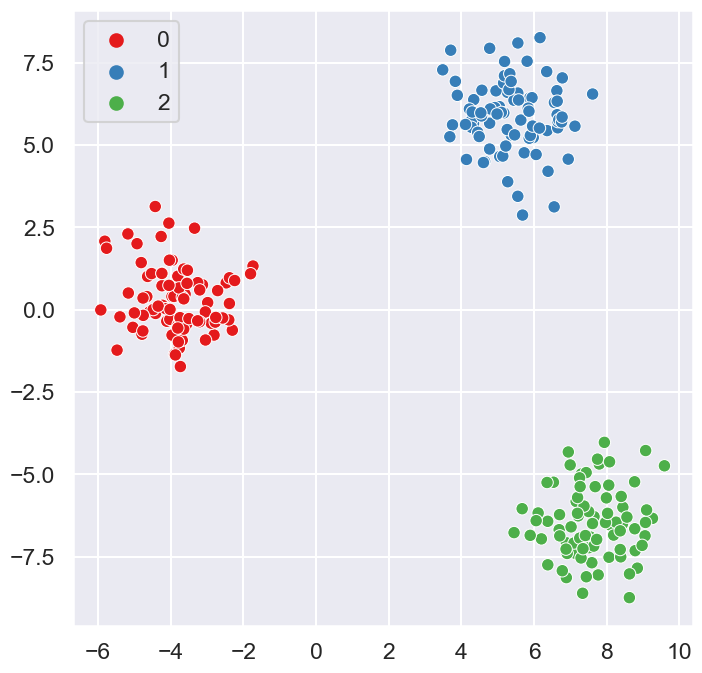

In [3]:
n_points = 250
data_blobs, labels_blobs = make_blobs(n_samples=n_points, n_features=2, centers=3, cluster_std=1, center_box=[-10,10], random_state=26)

sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:, 1], hue=labels_blobs, palette="Set1")
plt.show()

### Moons

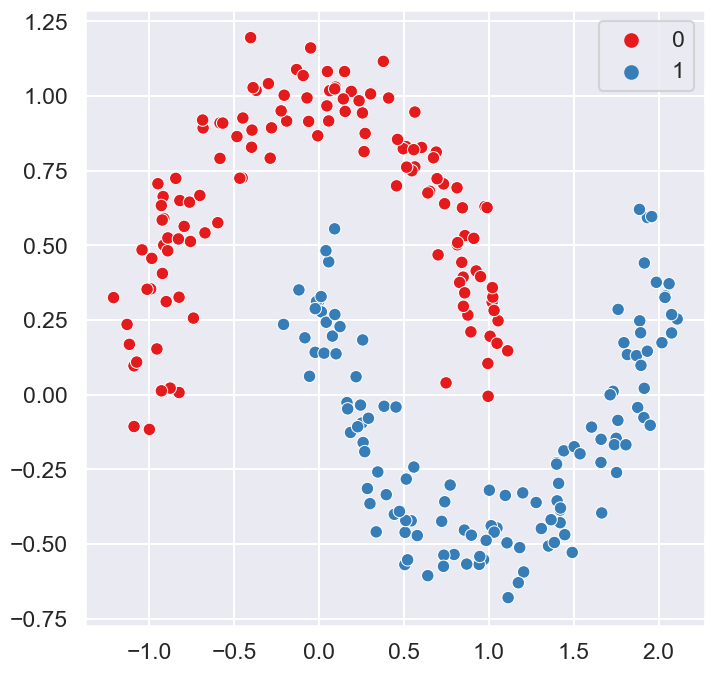

In [4]:
n_points = 250
data_moons, labels_moons = make_moons(n_samples=n_points, noise=.1, random_state=12)

sns.scatterplot(x=data_moons[:, 0], y=data_moons[:, 1], hue=labels_moons, palette="Set1")
plt.show()

### Circles

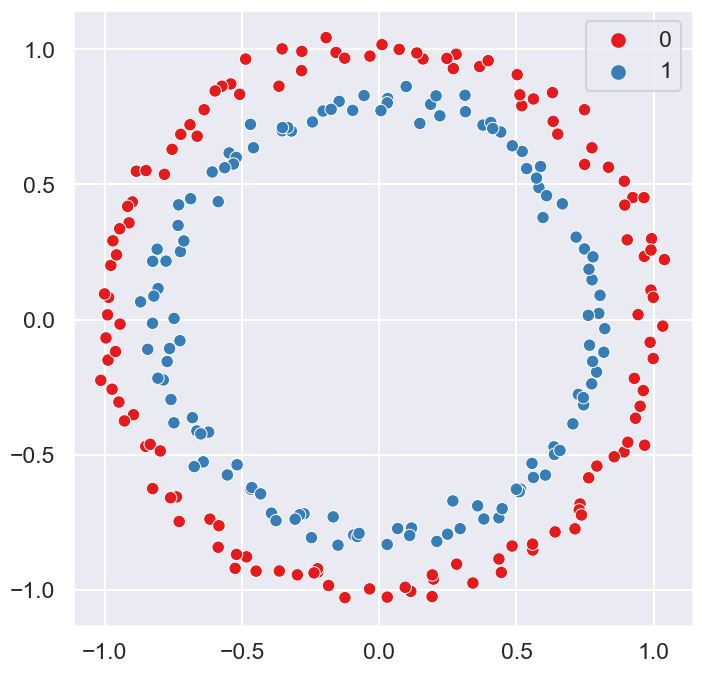

In [5]:
n_points = 250
data_circles, labels_circles = make_circles(n_samples=n_points, noise=.03, random_state=42)

sns.scatterplot(x=data_circles[:, 0], y=data_circles[:, 1], hue=labels_circles, palette="Set1")
plt.show()

# $k$-means algorithm

__Objective__: Find _cluster centers_ or _centroids_ representing the different clusters

## Handmade $k$-means (using only `numpy`)

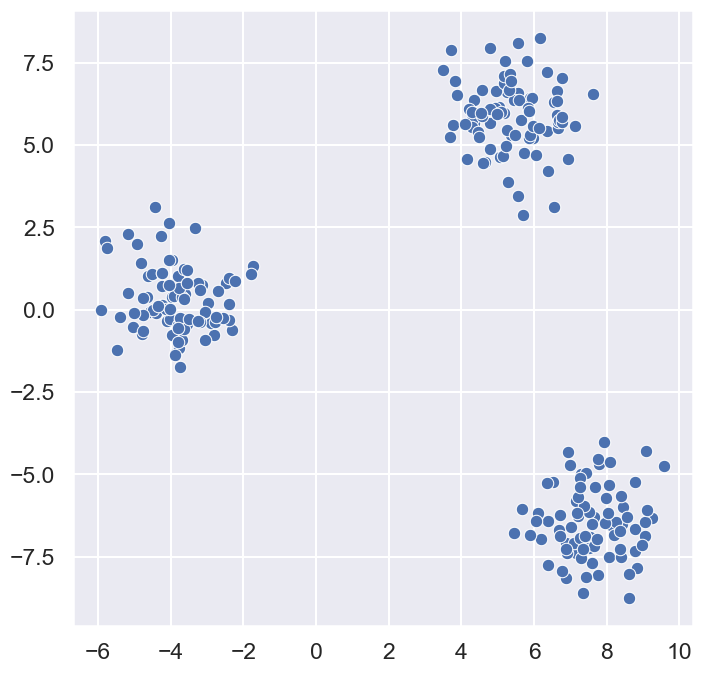

In [6]:
n_points = 250
data = data_blobs

sns.scatterplot(x=data[:, 0], y=data[:, 1])
plt.show()

#### Initialization

$K = 3$

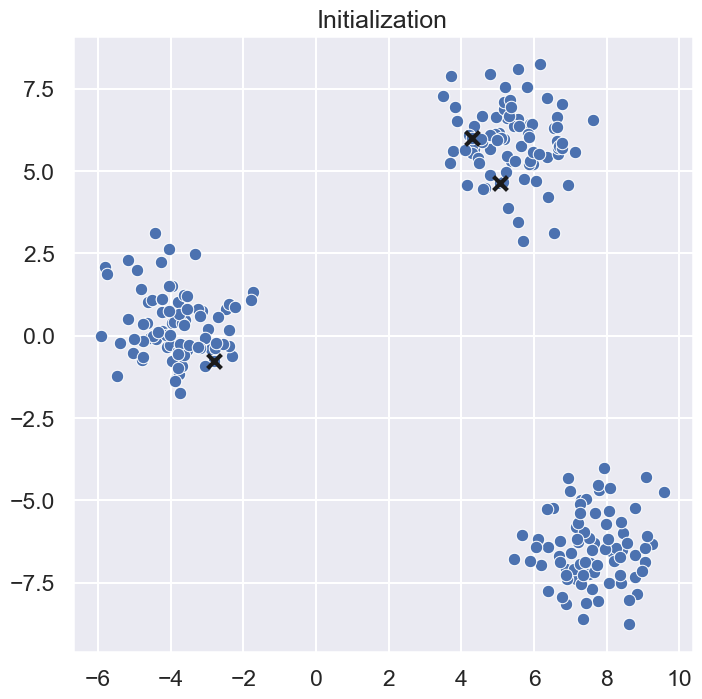

In [7]:
K = 3

centroids_idx = np.random.randint(0, n_points, K)
centroids = data[centroids_idx]

sns.scatterplot(x=data[:, 0], y=data[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Initialization")

plt.show()

#### Allocation update

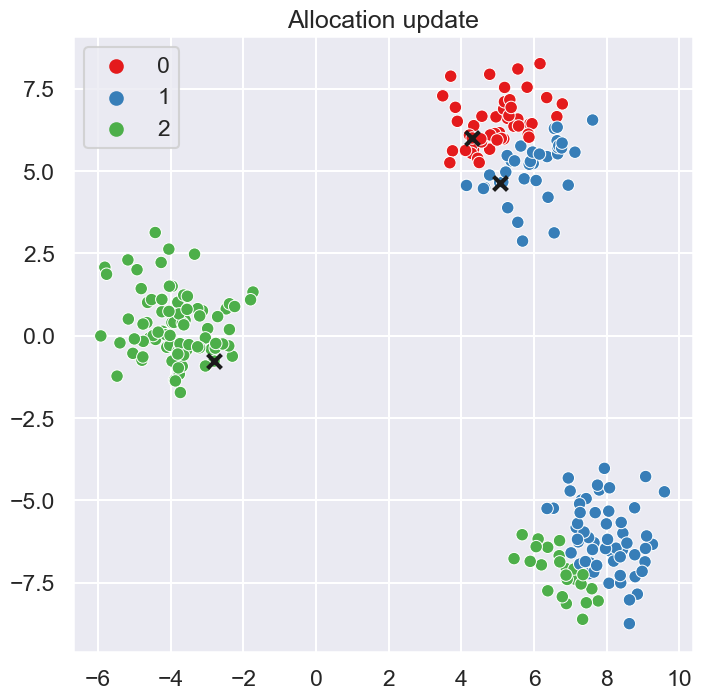

In [8]:
labels = np.array([-1] * n_points)
for i_d in range(len(data)):
    dist = 1000
    for i in range(K):
        new_dist = np.linalg.norm(data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i
            
sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Allocation update")

plt.show()

#### Centroids update

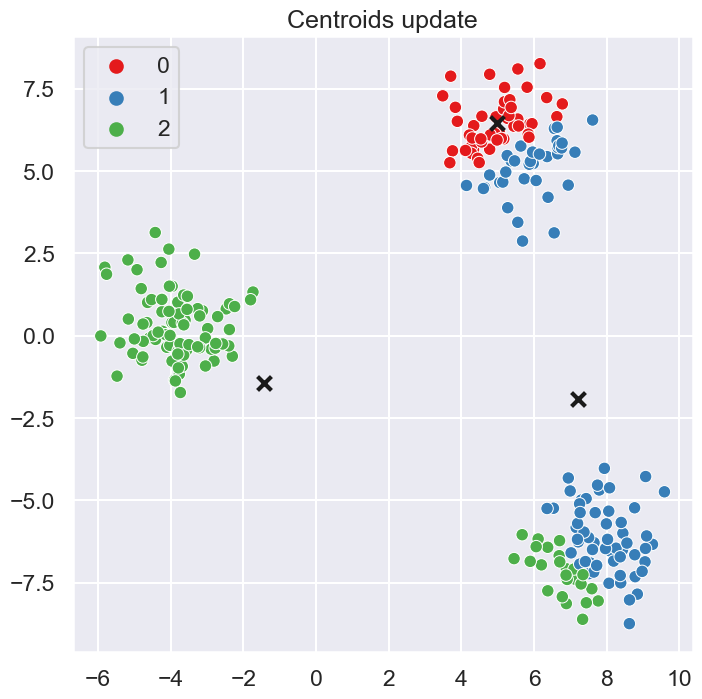

In [9]:
for i in range(K):
    centroids[i] = np.mean(data[labels == i], axis=0)

sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Centroids update")

plt.show()

#### More steps

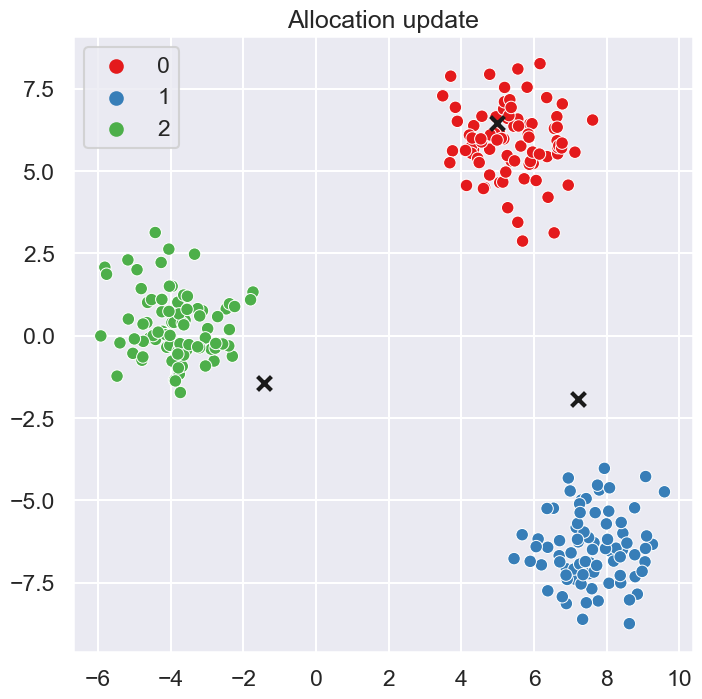

In [10]:
labels = np.array([-1] * n_points)
for i_d in range(len(data)):
    dist = 1000
    for i in range(K):
        new_dist = np.linalg.norm(data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i
            
sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Allocation update")

plt.show()

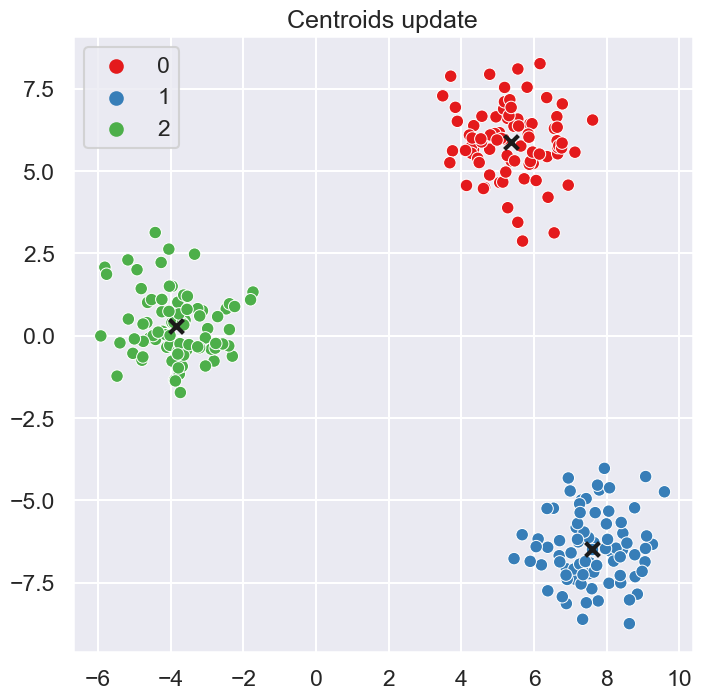

In [11]:
for i in range(K):
    centroids[i] = np.mean(data[labels == i], axis=0)
       
sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Centroids update") 

plt.show()

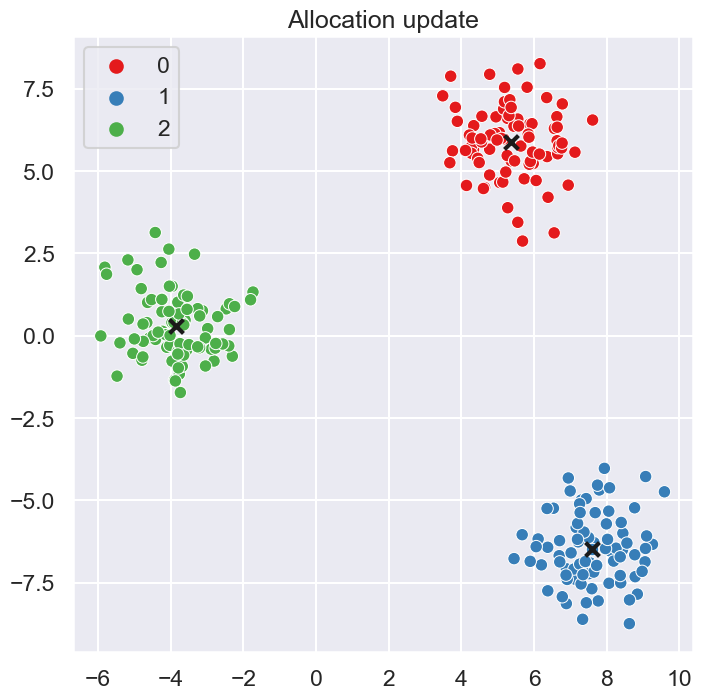

In [12]:
labels = np.array([-1] * n_points)
for i_d in range(len(data)):
    dist = 1000
    for i in range(K):
        new_dist = np.linalg.norm(data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i
         
sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Allocation update")   

plt.show()

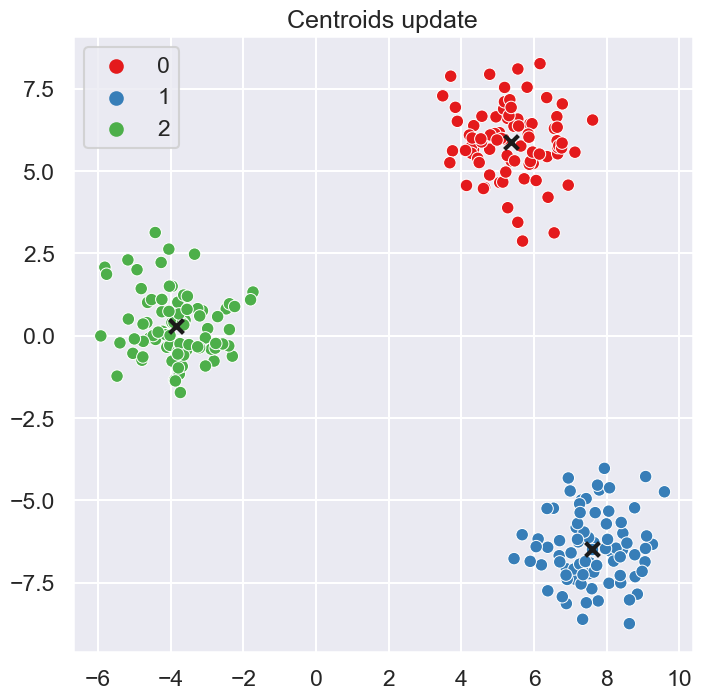

In [13]:
for i in range(K):
    centroids[i] = np.mean(data[labels == i], axis=0)
     
sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Centroids update")   

plt.show()

#### Even more steps

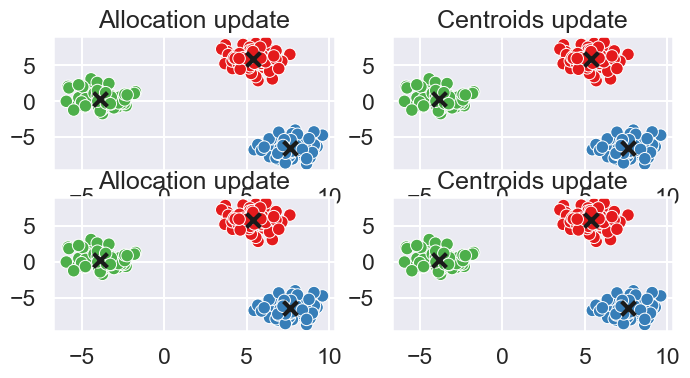

In [14]:
maxIter = 2

for iter in range(maxIter):   
    # Allocation update
    labels = np.array([-1] * n_points)
    for i_d in range(len(data)):
        dist = 1000
        for i in range(K):
            new_dist = np.linalg.norm(data[i_d]-centroids[i])
            if new_dist < dist:
                dist = new_dist
                labels[i_d] = i
    
    plt.subplot(2*maxIter,2,2*iter+1)
    sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
    plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
    plt.title("Allocation update")
    plt.legend('',frameon=False)
    
    # Centroids update
    for i in range(K):
        centroids[i] = np.mean(data[labels == i], axis=0)
    
    plt.subplot(2*maxIter,2,2*iter+2)
    sns.scatterplot(x=data[:, 0], y=data[:,1], hue=labels, palette="Set1")
    plt.scatter(centroids[:,0], centroids[:,1], c="k", marker="x", s=100, linewidths=3)
    plt.title("Centroids update")
    plt.legend('',frameon=False)

# plt.tight_layout()
plt.show()

## $k$-means using `scikit-learn`

In [15]:
from sklearn.cluster import KMeans

### Blobs

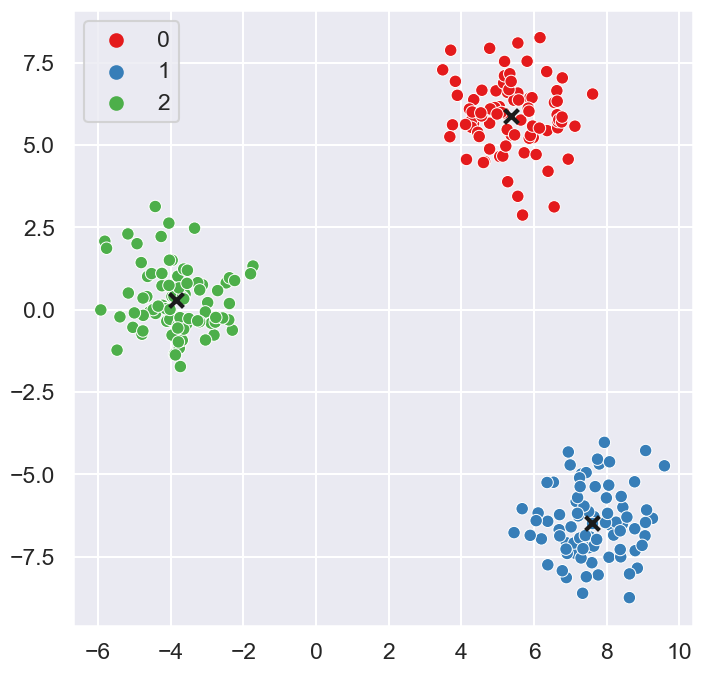

In [16]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(data_blobs)

clusters_blobs = kmeans.predict(data_blobs)
centroids_blobs = kmeans.cluster_centers_

sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:, 1], hue=clusters_blobs, palette="Set1")
plt.scatter(centroids_blobs[:,0], centroids_blobs[:,1], c="k", marker="x", s=100, linewidths=3)

plt.show()

### Moons

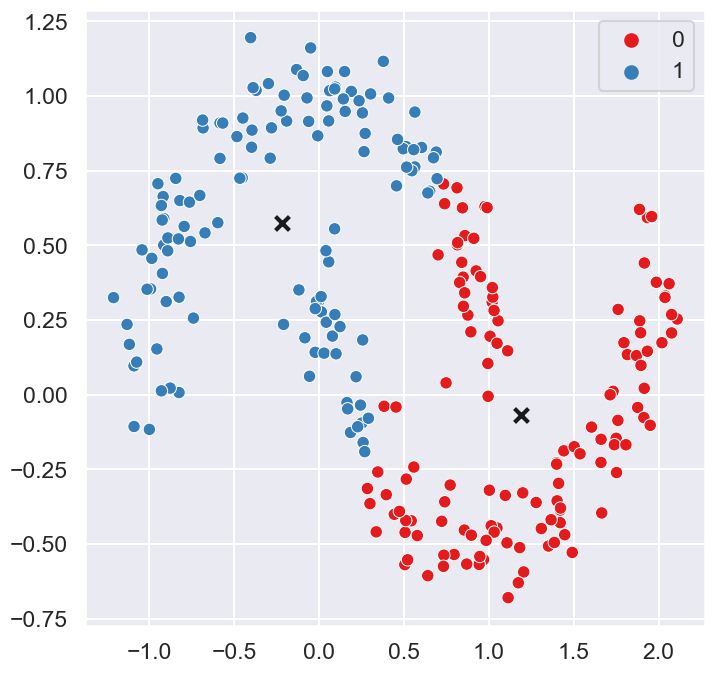

In [17]:
K = 2
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(data_moons)

clusters_moons = kmeans.predict(data_moons)
centroids_moons = kmeans.cluster_centers_

sns.scatterplot(x=data_moons[:, 0], y=data_moons[:, 1], hue=clusters_moons, palette="Set1")
plt.scatter(centroids_moons[:,0], centroids_moons[:,1], c="k", marker="x", s=100, linewidths=3)
plt.show()

### Circles

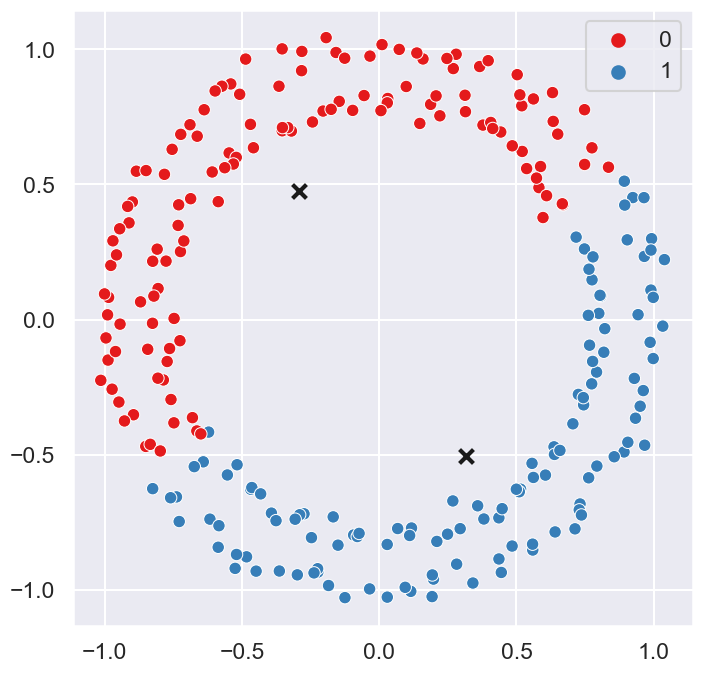

In [18]:
K = 2
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(data_circles)

clusters_circles = kmeans.predict(data_circles)
centroids_circles = kmeans.cluster_centers_

sns.scatterplot(x=data_circles[:, 0], y=data_circles[:, 1], hue=clusters_circles, palette="Set1")
plt.scatter(centroids_circles[:,0], centroids_circles[:,1], c="k", marker="x", s=100, linewidths=3)
plt.show()

## Choice of $K$

In [65]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

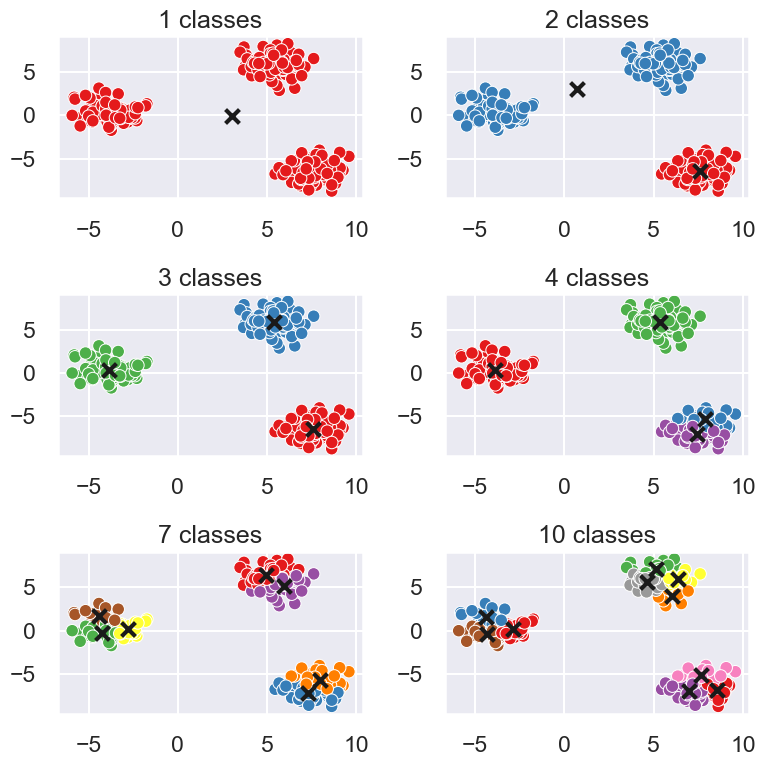

In [66]:
lstK = [1,2,3,4,7,10]

for i, K in enumerate(lstK):
    kmeans = KMeans(n_clusters=K, n_init=10)
    kmeans.fit(data_blobs)

    clusters_blobs = kmeans.predict(data_blobs)
    centroids_blobs = kmeans.cluster_centers_

    plt.subplot(len(lstK)//2,2,i+1)
    sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:, 1], hue=clusters_blobs, palette="Set1")
    plt.scatter(centroids_blobs[:,0], centroids_blobs[:,1], c="k", marker="x", s=100, linewidths=3)
    plt.title("%i classes" % K)
    plt.legend("", frameon=False)

plt.tight_layout()
plt.show()

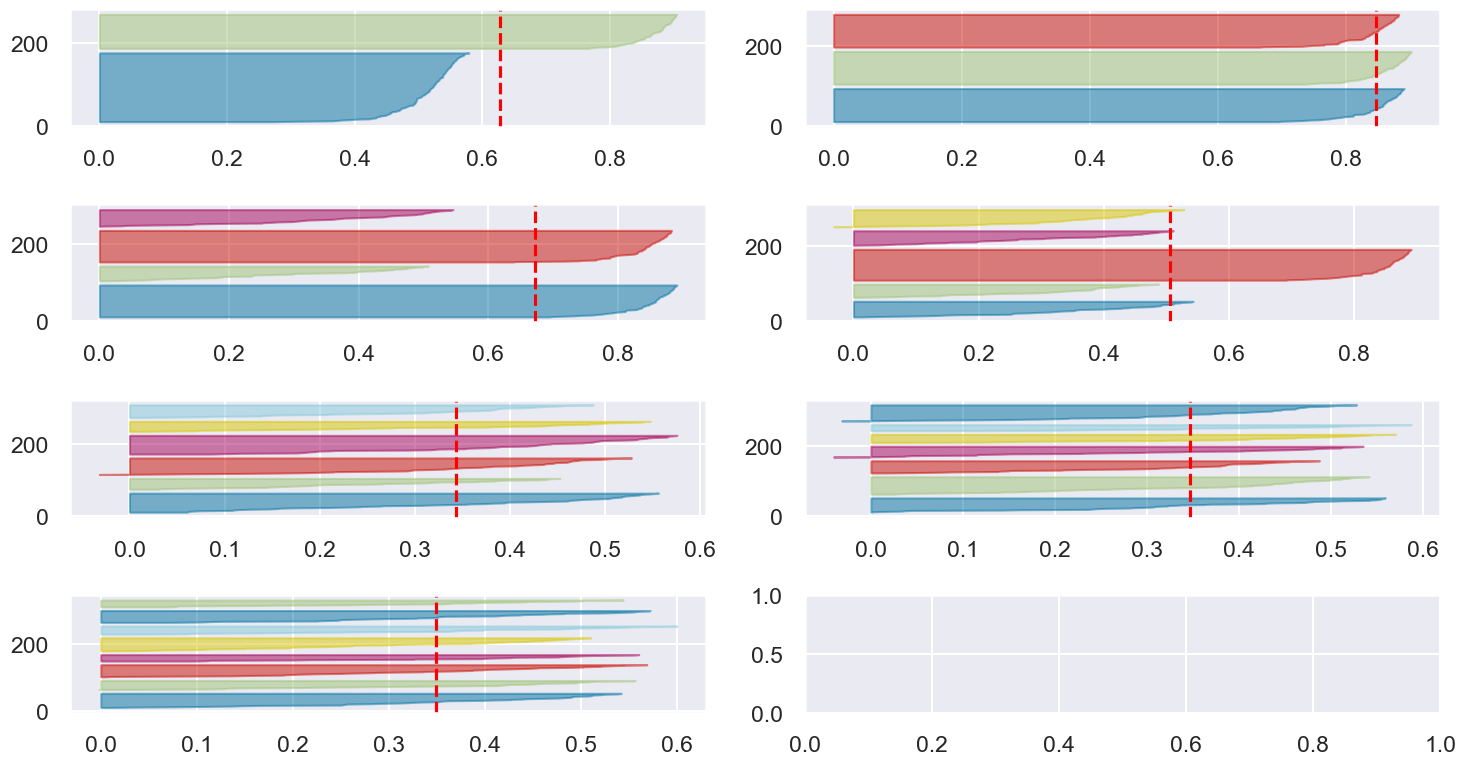

In [67]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for K in range(2, 9):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(K, 2)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_blobs)
  
plt.tight_layout()
plt.show()

## Initialization of Centroids

In [22]:
def forgy_initialize(X, K):
    '''
    Return Randomly sampled points from the data
    '''    
    return X[np.random.choice(range(X.shape[0]), replace = False, size = K), :]

In [23]:
def random_partition(X, k):
    '''
    Assign each point randomly to a cluster. Then calculate the average data in each cluster to get the centers
    '''
    indices = np.random.choice(range(0, k), replace = True, size = X.shape[0])
    mean = []
    for count in range(k):
        mean.append(X[indices == count].mean(axis=0))
        
    return np.concatenate([val[ None, :] for val in mean], axis = 0)

In [24]:
def dist(data, centers):
    distance = np.sum((np.array(centers) - data[:, None, :])**2, axis = 2)
    return distance


def kmeans_plus_plus(X, k, pdf_method = True):
    '''
    Initialize one point at random.
    loop for k - 1 iterations:
        Next, calculate for each point the distance of the point from its nearest center. Sample a point with a 
        probability proportional to the square of the distance of the point from its nearest center.
    '''
    centers = []
    X = np.array(X)
    
    # Sample the first point
    initial_index = np.random.choice(range(X.shape[0]), )
    centers.append(X[initial_index, :].tolist())
    
    print('max: ', np.max(np.sum((X - np.array(centers))**2)))
    
    # Loop and select the remaining points
    for i in range(k - 1):
        print(i)
        distance = dist(X, np.array(centers))
        
        if i == 0:
            pdf = distance/np.sum(distance)
            centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
        else:
            # Calculate the distance of each point from its nearest centroid
            dist_min = np.min(distance, axis = 1)
            if pdf_method == True:
                pdf = dist_min/np.sum(dist_min)# Sample one point from the given distribution
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf)]
            else:
                index_max = np.argmax(dist_min, axis = 0)
                centroid_new = X[index_max, :]
        centers.append(centroid_new.tolist())
        
    return np.array(centers)

max:  25015.985100306032
0
1


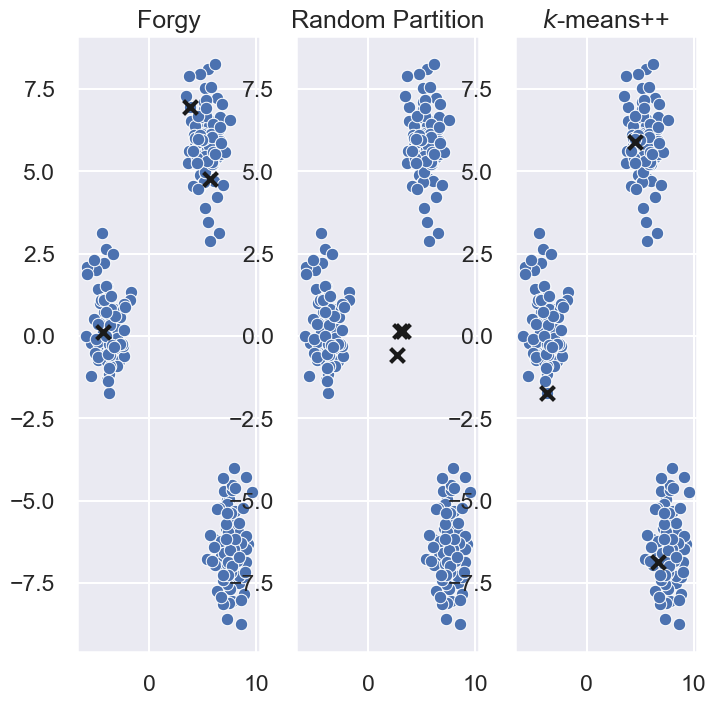

In [68]:
K = 3

centroids_forgy = forgy_initialize(data_blobs, K)
centroids_random = random_partition(data_blobs, K)
centroids_plus_plus = kmeans_plus_plus(data_blobs, K)

plt.subplot(1,3,1)
sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:,1])
plt.scatter(centroids_forgy[:,0], centroids_forgy[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Forgy")

plt.subplot(1,3,2)
sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:,1])
plt.scatter(centroids_random[:,0], centroids_random[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("Random Partition")

plt.subplot(1,3,3)
sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:,1])
plt.scatter(centroids_plus_plus[:,0], centroids_plus_plus[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("$k$-means++")

plt.show()

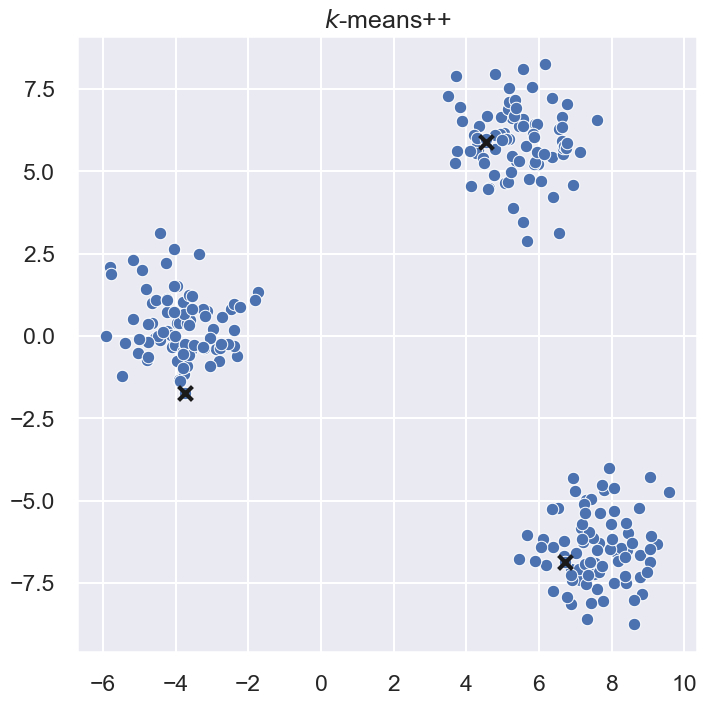

In [69]:
sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:,1])
plt.scatter(centroids_plus_plus[:,0], centroids_plus_plus[:,1], c="k", marker="x", s=100, linewidths=3)
plt.title("$k$-means++")
plt.show()

# Qualitative variables

## MCA + $k$-means

In [27]:
"""
%pip install kmodes
%pip install prince
"""

'\n%pip install kmodes\n%pip install prince\n'

In [28]:
dogs = pd.read_csv('dogs.txt', header = None)
dogs.head()

,0,1,2,3,4,5,6,7
0,beauceron,3,2,3,2,2,2,useful
1,basset,1,1,1,1,1,2,hunting
2,boxer,2,2,2,2,2,2,pet
3,brittany_spaniel,2,2,2,3,2,1,hunting
4,bull-dog,1,1,1,2,2,1,pet


In [29]:
import prince

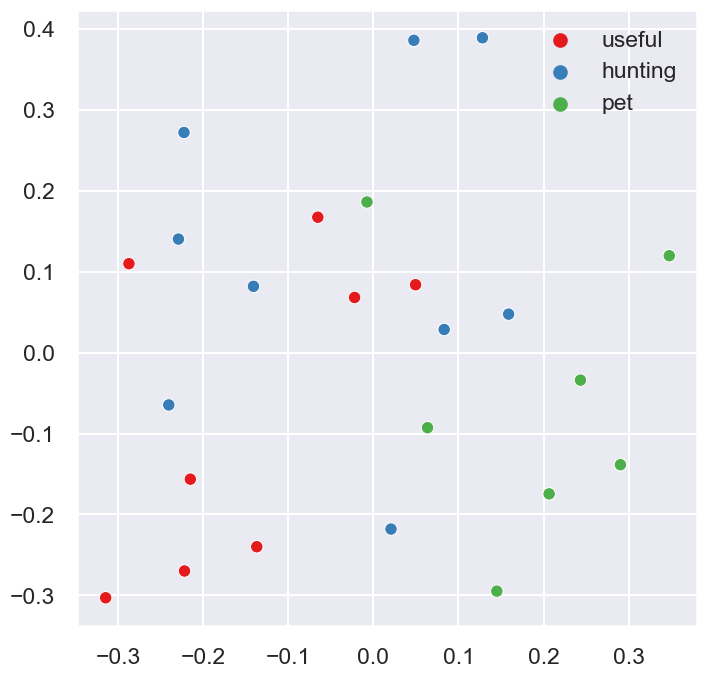

In [70]:
dogs_breeds = dogs.iloc[:,1:-1]
dogs_types = dogs.iloc[:,-1].to_numpy()

mca = prince.MCA(n_components=2, engine='sklearn',)
mca = mca.fit(dogs_breeds)
mca_dogs = mca.svd_.U

sns.scatterplot(x=mca_dogs[:, 0], y=mca_dogs[:, 1], hue=dogs_types, palette="Set1")
plt.show()

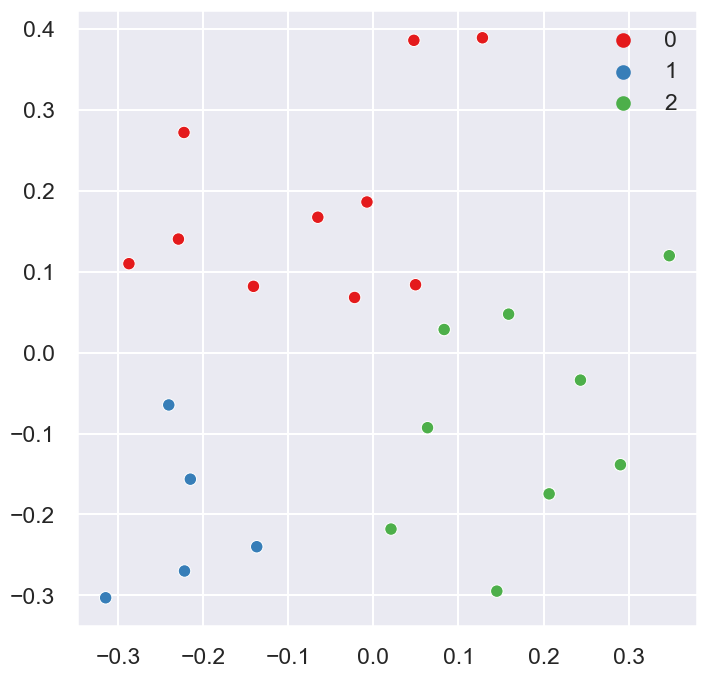

In [71]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(mca_dogs)

clusters_dogs_mca = kmeans.predict(mca_dogs)

sns.scatterplot(x=mca_dogs[:, 0], y=mca_dogs[:, 1], hue=clusters_dogs_mca, palette="Set1")
plt.show()

## $k$-modes algorithm

In [32]:
from kmodes.kmodes import KModes

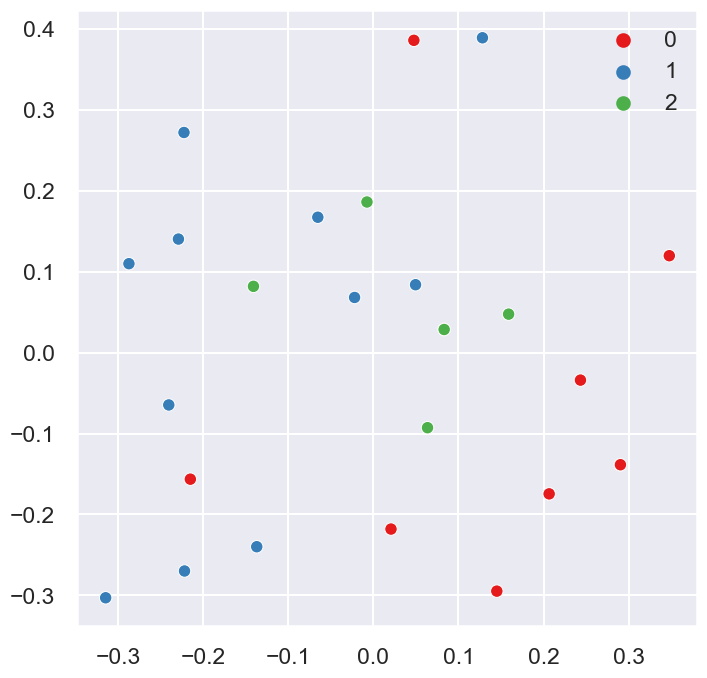

In [72]:
K = 3
kmodes = KModes(n_clusters=K, init='Huang', n_init=5, verbose=0)
kmodes.fit(dogs_breeds)

clusters_dogs = kmodes.predict(dogs_breeds)

sns.scatterplot(x=mca_dogs[:, 0], y=mca_dogs[:, 1], hue=clusters_dogs, palette="Set1")
plt.show()

# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

In [34]:
from sklearn.cluster import DBSCAN

In [78]:
def dbscanPlot(data, dbscan):
    labels = dbscan.labels_
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    
    idx_core = core_samples_mask * (labels != -1)
    idx_border = ~core_samples_mask * (labels != -1)
    idx_noise = labels == -1
    
    sns.scatterplot(x=data[idx_noise,0], y=data[idx_noise,1], c="k", s=30)
    sns.scatterplot(x=data[idx_core,0], y=data[idx_core,1], hue=labels[idx_core], palette="Set1", s=80)
    sns.scatterplot(x=data[idx_border,0], y=data[idx_border,1], hue=labels[idx_border], palette="Set1", s=50)

    plt.legend("", frameon=False) #np.insert(np.arange(3),0,-1)
    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

### Blobs

Estimated number of clusters    : 3
Estimated number of noise points: 2



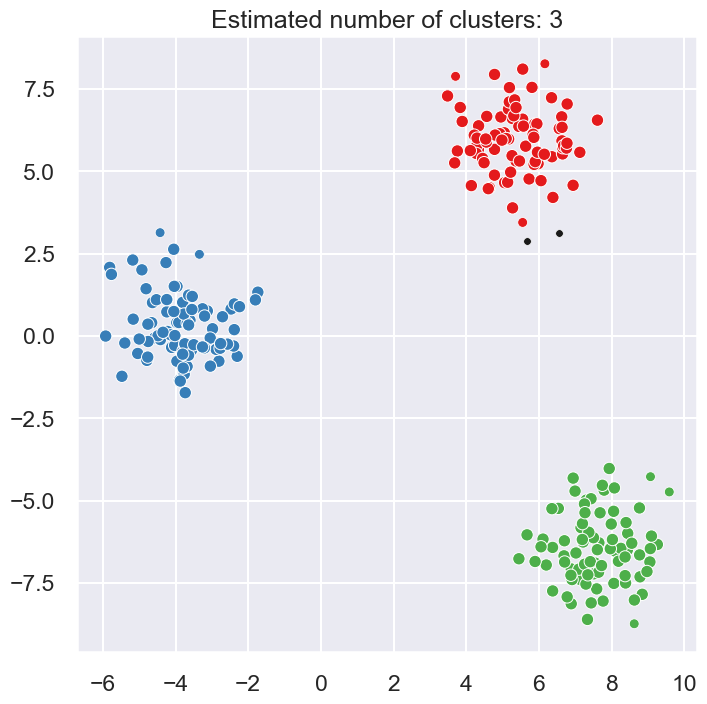

In [96]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(data_blobs)

clusters_blobs = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters_blobs)) - (1 if -1 in clusters_blobs else 0)
n_noise_ = list(clusters_blobs).count(-1)

print("Estimated number of clusters    : %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("")

dbscanPlot(data_blobs, dbscan)

### Moons

Estimated number of clusters    : 2
Estimated number of noise points: 0



/var/folders/pv/w96wvnnj27j18vplbhmz_yvwvgj4vl/T/ipykernel_45078/3405205205.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[idx_border,0], y=data[idx_border,1], hue=labels[idx_border], palette="Set1", s=50)


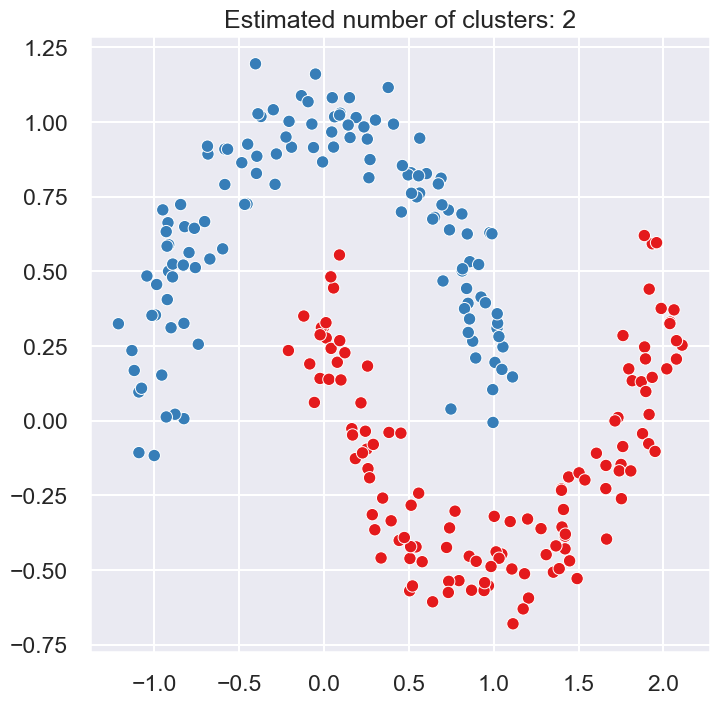

In [99]:
dbscan = DBSCAN(eps=.3, min_samples=4)
dbscan.fit(data_moons)

clusters_moons = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters_moons)) - (1 if -1 in clusters_moons else 0)
n_noise_ = list(clusters_moons).count(-1)

print("Estimated number of clusters    : %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("")

dbscanPlot(data_moons, dbscan)

### Circles

Estimated number of clusters    : 17
Estimated number of noise points: 7



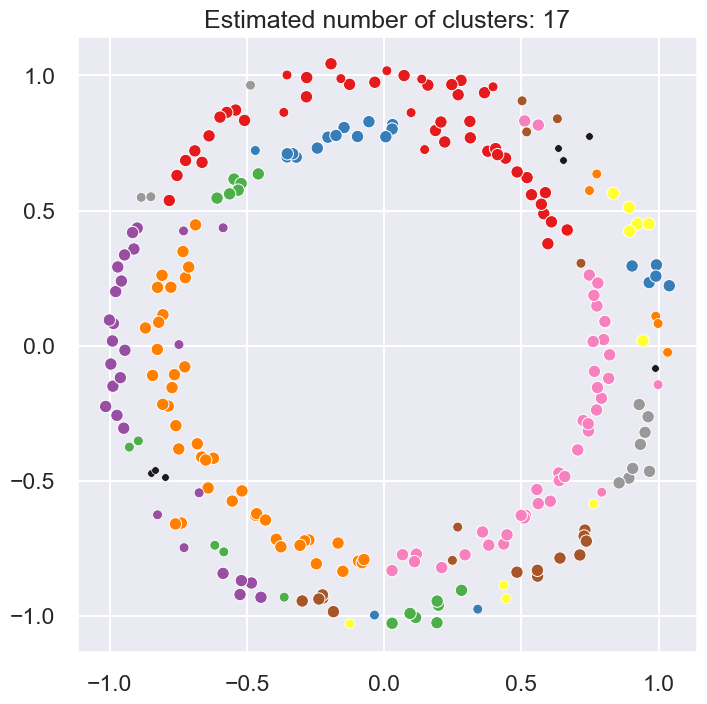

In [115]:
dbscan = DBSCAN(eps=.11, min_samples=4)
dbscan.fit(data_circles)

clusters_circles = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters_circles)) - (1 if -1 in clusters_circles else 0)
n_noise_ = list(clusters_circles).count(-1)

print("Estimated number of clusters    : %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("")

dbscanPlot(data_circles, dbscan)

## Influence of $MinPts$ and $\varepsilon$

Estimated number of clusters    : 6
Estimated number of noise points: 1



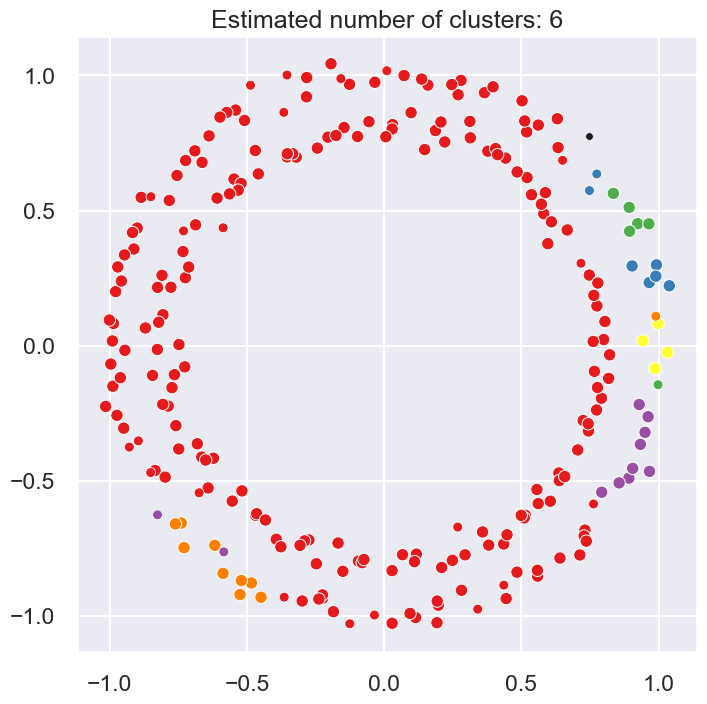

In [147]:
dbscan = DBSCAN(eps=.12, min_samples=4)
dbscan.fit(data_circles)

clusters_circles = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters_circles)) - (1 if -1 in clusters_circles else 0)
n_noise_ = list(clusters_circles).count(-1)

print("Estimated number of clusters    : %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("")

dbscanPlot(data_circles, dbscan)

## Choice of $\varepsilon$

In [82]:
from sklearn.neighbors import NearestNeighbors

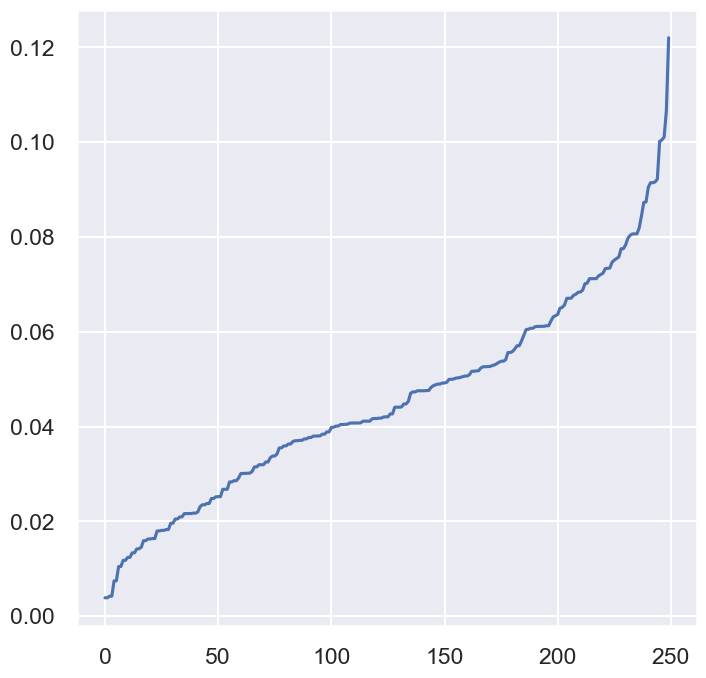

In [139]:
data = data_circles
minPts = 4

neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(data)

distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.show()